## Loading the data and other imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('relative_humidity.csv')

### Data Overview

In [3]:
df.head(3)

,new_time,sound_pressure_level [dba],air_temperature [Celsius],indoor_co2 [ppm],baromatic_pressure [hPa],dry_bulb_temp [Celsius],outdoor_co2 [ppm],indoor_relative_humidity [%]
0,2021-09-07 00:00:00,57.073334,23.564333,453.500000,1005.198364,26.101631,463.093536,52.019665
1,2021-09-07 00:05:00,57.016666,23.487333,448.866669,1005.198425,26.101616,462.096314,51.080666
2,2021-09-07 00:10:00,57.083332,23.424000,447.333344,1005.200012,26.100000,463.476074,50.410667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8352 entries, 0 to 8351
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   new_time                      8352 non-null   object 
 1   sound_pressure_level [dba]    8352 non-null   float64
 2   air_temperature [Celsius]     8352 non-null   float64
 3   indoor_co2 [ppm]              8352 non-null   float64
 4   baromatic_pressure [hPa]      8352 non-null   float64
 5   dry_bulb_temp [Celsius]       8352 non-null   float64
 6   outdoor_co2 [ppm]             8352 non-null   float64
 7   indoor_relative_humidity [%]  8352 non-null   float64
dtypes: float64(7), object(1)
memory usage: 522.1+ KB


In [5]:
df.describe()

,sound_pressure_level [dba],air_temperature [Celsius],indoor_co2 [ppm],baromatic_pressure [hPa],dry_bulb_temp [Celsius],outdoor_co2 [ppm],indoor_relative_humidity [%]
count,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000
mean,55.037814,25.572291,467.198732,1003.080744,28.026258,474.115393,71.216628
std,3.012204,1.831005,80.700313,1.575338,2.021168,11.553178,11.441801
min,48.450001,20.442759,400.000000,998.799988,22.601658,438.571075,45.385174
25%,52.450001,24.585333,426.631248,1002.099976,26.500000,465.507996,63.781477
50%,54.624166,25.512000,440.321838,1003.099976,27.600017,471.272812,74.352463
75%,56.400834,26.821451,469.210358,1004.200012,29.499995,483.293510,80.219313
max,78.596664,33.995171,1489.357178,1007.200012,34.899982,509.600678,93.003998


In [6]:
df['new_time'] = pd.to_datetime(df['new_time'])

In [7]:
df.corr()

,new_time,sound_pressure_level [dba],air_temperature [Celsius],indoor_co2 [ppm],baromatic_pressure [hPa],dry_bulb_temp [Celsius],outdoor_co2 [ppm],indoor_relative_humidity [%]
new_time,1.000000,-0.363390,0.628958,0.026863,-0.057446,0.003074,0.083242,0.465204
sound_pressure_level [dba],-0.363390,1.000000,-0.381526,0.236388,0.274390,-0.230619,-0.223695,-0.421622
air_temperature [Celsius],0.628958,-0.381526,1.000000,0.212621,-0.233988,0.180415,0.234144,0.499465
indoor_co2 [ppm],0.026863,0.236388,0.212621,1.000000,-0.060748,-0.117304,-0.091661,-0.148561
baromatic_pressure [hPa],-0.057446,0.274390,-0.233988,-0.060748,1.000000,-0.175125,-0.111329,-0.273345
dry_bulb_temp [Celsius],0.003074,-0.230619,0.180415,-0.117304,-0.175125,1.000000,0.946892,0.123641
outdoor_co2 [ppm],0.083242,-0.223695,0.234144,-0.091661,-0.111329,0.946892,1.000000,0.134295
indoor_relative_humidity [%],0.465204,-0.421622,0.499465,-0.148561,-0.273345,0.123641,0.134295,1.000000


<Axes: >

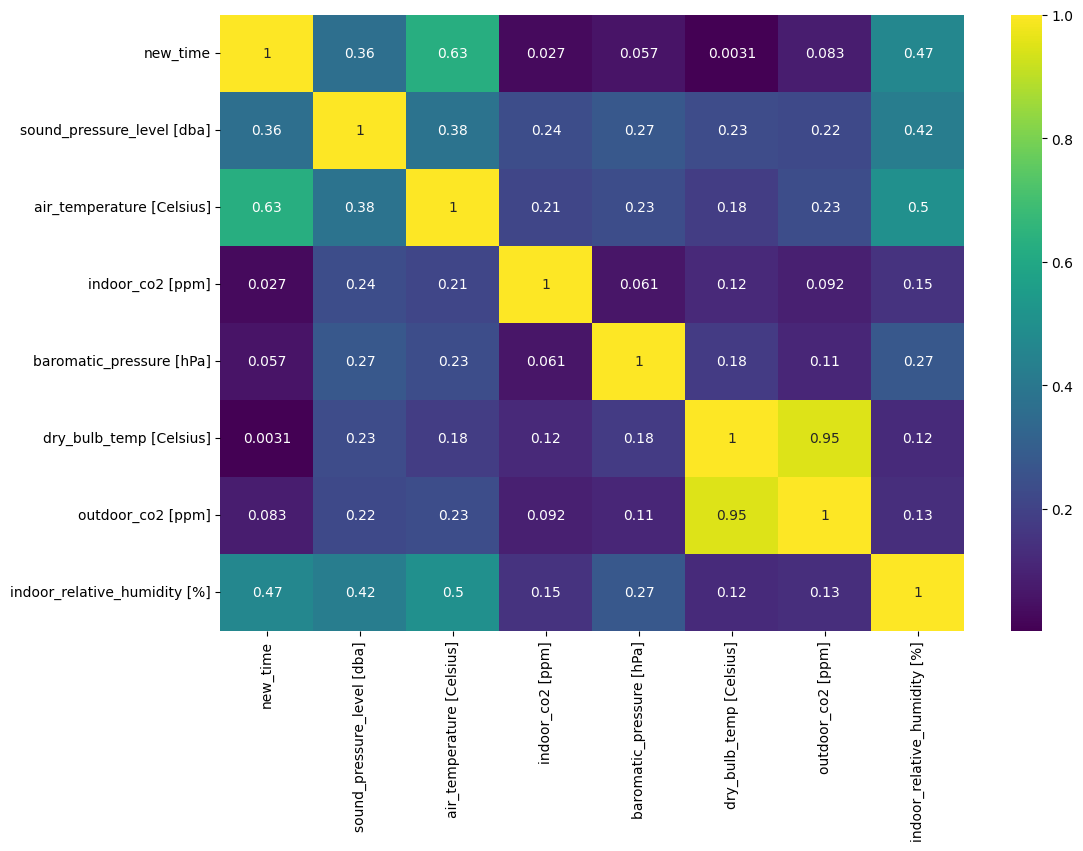

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().abs(),annot=True,cmap='viridis')

In [9]:
df.corr()["indoor_relative_humidity [%]"].sort_values()

sound_pressure_level [dba]     -0.421622
baromatic_pressure [hPa]       -0.273345
indoor_co2 [ppm]               -0.148561
dry_bulb_temp [Celsius]         0.123641
outdoor_co2 [ppm]               0.134295
new_time                        0.465204
air_temperature [Celsius]       0.499465
indoor_relative_humidity [%]    1.000000
Name: indoor_relative_humidity [%], dtype: float64

<Axes: >

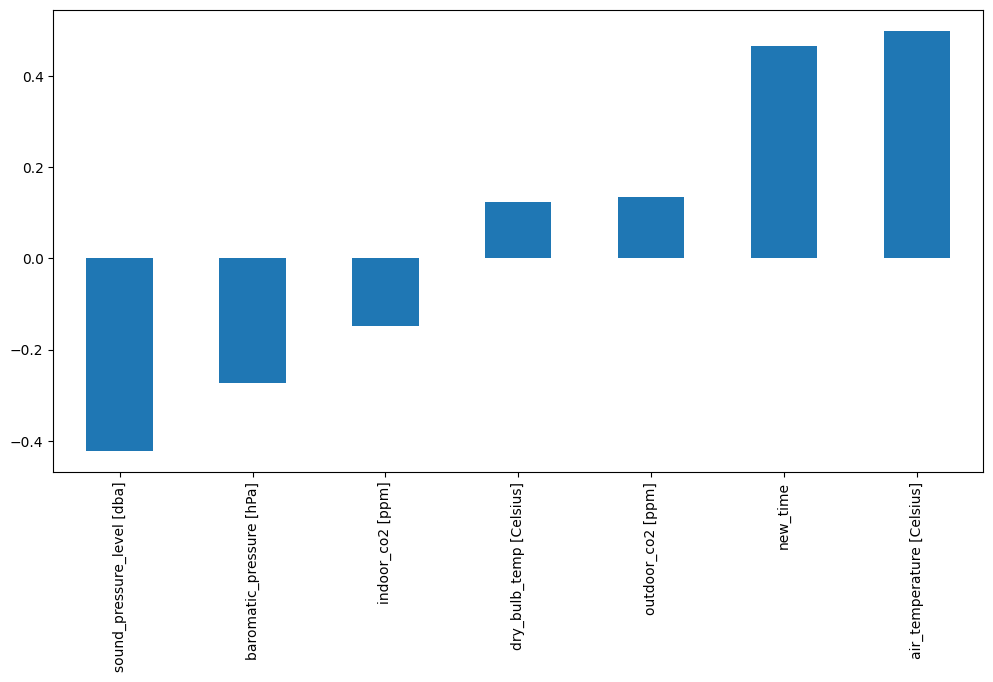

In [10]:
plt.figure(figsize=(12,6))
df.corr()["indoor_relative_humidity [%]"].sort_values().drop("indoor_relative_humidity [%]").plot(kind="bar")

#### Choose data that is correlated with Humidity

In [11]:
corr_with_rh = df.corr().abs()["indoor_relative_humidity [%]"]
df =df[corr_with_rh[corr_with_rh > 0.25].index]

In [12]:
df.columns

Index(['new_time', 'sound_pressure_level [dba]', 'air_temperature [Celsius]',
       'baromatic_pressure [hPa]', 'indoor_relative_humidity [%]'],
      dtype='object')

In [13]:
df.set_index('new_time', inplace=True)

In [14]:
df.head()

,sound_pressure_level [dba],air_temperature [Celsius],baromatic_pressure [hPa],indoor_relative_humidity [%]
new_time,,,,
2021-09-07 00:00:00,57.073334,23.564333,1005.198364,52.019665
2021-09-07 00:05:00,57.016666,23.487333,1005.198425,51.080666
2021-09-07 00:10:00,57.083332,23.424000,1005.200012,50.410667
2021-09-07 00:15:00,57.093334,23.253000,1005.200012,50.502666
2021-09-07 00:20:00,57.016666,23.309000,1005.003235,50.307667


#### Picking data every ten minutes

In [23]:
index = df.index

In [24]:
new_index = pd.date_range(start=index[0], end=index[-1], freq='10T')
data = df.loc[new_index]

In [25]:
data.head(5)

,sound_pressure_level [dba],air_temperature [Celsius],baromatic_pressure [hPa],indoor_relative_humidity [%]
2021-09-07 00:00:00,57.073334,23.564333,1005.198364,52.019665
2021-09-07 00:10:00,57.083332,23.424000,1005.200012,50.410667
2021-09-07 00:20:00,57.016666,23.309000,1005.003235,50.307667
2021-09-07 00:30:00,57.209999,23.264999,1005.000000,49.806667
2021-09-07 00:40:00,57.148277,23.170000,1004.996765,49.442760


<Axes: >

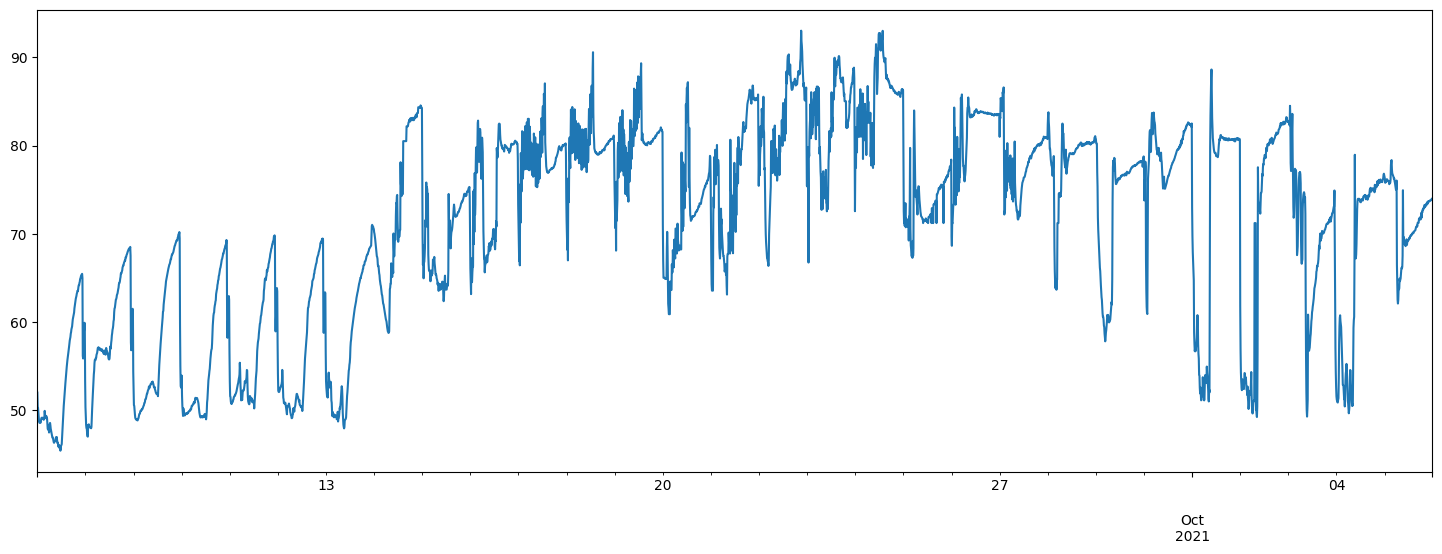

In [26]:
plt.figure(figsize=(18,6))
data["indoor_relative_humidity [%]"].plot()

# Data Preprocessing 

In [27]:
data['Seconds'] = data.index.map(pd.Timestamp.timestamp)

In [28]:
data.head()

,sound_pressure_level [dba],air_temperature [Celsius],baromatic_pressure [hPa],indoor_relative_humidity [%],Seconds
2021-09-07 00:00:00,57.073334,23.564333,1005.198364,52.019665,1.630973e+09
2021-09-07 00:10:00,57.083332,23.424000,1005.200012,50.410667,1.630973e+09
2021-09-07 00:20:00,57.016666,23.309000,1005.003235,50.307667,1.630974e+09
2021-09-07 00:30:00,57.209999,23.264999,1005.000000,49.806667,1.630975e+09
2021-09-07 00:40:00,57.148277,23.170000,1004.996765,49.442760,1.630975e+09


In [29]:
day = 60*60*24
year = 365.2425*day

data['Day sin'] = np.sin(data['Seconds'] * (2* np.pi / day))
data['Day cos'] = np.cos(data['Seconds'] * (2 * np.pi / day))
data['Year sin'] = np.sin(data['Seconds'] * (2 * np.pi / year))
data['Year cos'] = np.cos(data['Seconds'] * (2 * np.pi / year))
data.head()

,sound_pressure_level [dba],air_temperature [Celsius],baromatic_pressure [hPa],indoor_relative_humidity [%],Seconds,Day sin,Day cos,Year sin,Year cos
2021-09-07 00:00:00,57.073334,23.564333,1005.198364,52.019665,1.630973e+09,-1.251766e-11,1.000000,-0.913896,-0.405949
2021-09-07 00:10:00,57.083332,23.424000,1005.200012,50.410667,1.630973e+09,4.361939e-02,0.999048,-0.913944,-0.405840
2021-09-07 00:20:00,57.016666,23.309000,1005.003235,50.307667,1.630974e+09,8.715574e-02,0.996195,-0.913993,-0.405730
2021-09-07 00:30:00,57.209999,23.264999,1005.000000,49.806667,1.630975e+09,1.305262e-01,0.991445,-0.914041,-0.405621
2021-09-07 00:40:00,57.148277,23.170000,1004.996765,49.442760,1.630975e+09,1.736482e-01,0.984808,-0.914090,-0.405512


In [30]:
data.drop("Seconds", axis=1, inplace=True)

In [31]:
data.columns

Index(['sound_pressure_level [dba]', 'air_temperature [Celsius]',
       'baromatic_pressure [hPa]', 'indoor_relative_humidity [%]', 'Day sin',
       'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

In [32]:
data = data[['indoor_relative_humidity [%]','sound_pressure_level [dba]', 'air_temperature [Celsius]',
       'baromatic_pressure [hPa]',  'Day sin',
       'Day cos', 'Year sin', 'Year cos']]

In [33]:
data.head()

,indoor_relative_humidity [%],sound_pressure_level [dba],air_temperature [Celsius],baromatic_pressure [hPa],Day sin,Day cos,Year sin,Year cos
2021-09-07 00:00:00,52.019665,57.073334,23.564333,1005.198364,-1.251766e-11,1.000000,-0.913896,-0.405949
2021-09-07 00:10:00,50.410667,57.083332,23.424000,1005.200012,4.361939e-02,0.999048,-0.913944,-0.405840
2021-09-07 00:20:00,50.307667,57.016666,23.309000,1005.003235,8.715574e-02,0.996195,-0.913993,-0.405730
2021-09-07 00:30:00,49.806667,57.209999,23.264999,1005.000000,1.305262e-01,0.991445,-0.914041,-0.405621
2021-09-07 00:40:00,49.442760,57.148277,23.170000,1004.996765,1.736482e-01,0.984808,-0.914090,-0.405512


#### Convert df to numpy arrays & creating windows of data

In [36]:
def df_to_X_y(df, window_size=4):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    # print(i)
    row = [r for r in df_as_np[i:i+window_size]]
    # print(row)
    X.append(row)
    label = df_as_np[i+window_size][0]
    # print(label)
    y.append(label)
  return np.array(X), np.array(y)

In [47]:
X, y = df_to_X_y(data)
X.shape, y.shape

((4172, 4, 8), (4172,))

In [48]:
X

array([[[52.01966476, 57.07333374, 23.56433296, ...,  1.        ,
         -0.91389584, -0.40594875],
        [50.41066742, 57.08333206, 23.42399979, ...,  0.99904822,
         -0.91394433, -0.40583957],
        [50.30766678, 57.01666641, 23.30900002, ...,  0.9961947 ,
         -0.91399281, -0.40573039],
        [49.80666733, 57.20999908, 23.26499939, ...,  0.99144486,
         -0.91404127, -0.40562119]],

       [[50.41066742, 57.08333206, 23.42399979, ...,  0.99904822,
         -0.91394433, -0.40583957],
        [50.30766678, 57.01666641, 23.30900002, ...,  0.9961947 ,
         -0.91399281, -0.40573039],
        [49.80666733, 57.20999908, 23.26499939, ...,  0.99144486,
         -0.91404127, -0.40562119],
        [49.44276047, 57.14827728, 23.17000008, ...,  0.98480775,
         -0.91408972, -0.405512  ]],

       [[50.30766678, 57.01666641, 23.30900002, ...,  0.9961947 ,
         -0.91399281, -0.40573039],
        [49.80666733, 57.20999908, 23.26499939, ...,  0.99144486,
         -0.

#### split the data into training, validation, and test sets

In [49]:
X_train, y_train = X[:3000], y[:3000]
X_val, y_val = X[3000:3800], y[3000:3800]
X_test, y_test = X[3800:], y[3800:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((3000, 4, 8), (3000,), (800, 4, 8), (800,), (372, 4, 8), (372,))

In [40]:
X_train

array([[[ 5.20196648e+01,  5.70733337e+01,  2.35643330e+01, ...,
          1.00000000e+00, -9.13895843e-01, -4.05948752e-01],
        [ 5.04106674e+01,  5.70833321e+01,  2.34239998e+01, ...,
          9.99048222e-01, -9.13944332e-01, -4.05839571e-01],
        [ 5.03076668e+01,  5.70166664e+01,  2.33090000e+01, ...,
          9.96194698e-01, -9.13992809e-01, -4.05730385e-01],
        [ 4.98066673e+01,  5.72099991e+01,  2.32649994e+01, ...,
          9.91444861e-01, -9.14041272e-01, -4.05621193e-01]],

       [[ 5.04106674e+01,  5.70833321e+01,  2.34239998e+01, ...,
          9.99048222e-01, -9.13944332e-01, -4.05839571e-01],
        [ 5.03076668e+01,  5.70166664e+01,  2.33090000e+01, ...,
          9.96194698e-01, -9.13992809e-01, -4.05730385e-01],
        [ 4.98066673e+01,  5.72099991e+01,  2.32649994e+01, ...,
          9.91444861e-01, -9.14041272e-01, -4.05621193e-01],
        [ 4.94427605e+01,  5.71482773e+01,  2.31700001e+01, ...,
          9.84807753e-01, -9.14089723e-01, -4.05511

#### scaling the features

In [41]:
data.head(3)

,indoor_relative_humidity [%],sound_pressure_level [dba],air_temperature [Celsius],baromatic_pressure [hPa],Day sin,Day cos,Year sin,Year cos
2021-09-07 00:00:00,52.019665,57.073334,23.564333,1005.198364,-1.251766e-11,1.000000,-0.913896,-0.405949
2021-09-07 00:10:00,50.410667,57.083332,23.424000,1005.200012,4.361939e-02,0.999048,-0.913944,-0.405840
2021-09-07 00:20:00,50.307667,57.016666,23.309000,1005.003235,8.715574e-02,0.996195,-0.913993,-0.405730


In [50]:
rh_training_mean = np.mean(X_train[:, :, 0])
rh_training_std = np.std(X_train[:, :, 0])

spl_training_mean =np.mean(X_train[:, :, 1])
spl_training_std = np.std(X_train[:, :, 1])

t_training_mean =np.mean(X_train[:, :, 2])
t_training_std = np.std(X_train[:, :, 2])

bp_training_mean =np.mean(X_train[:, :, 3])
bp_training_std = np.std(X_train[:, :, 3])

In [51]:
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - rh_training_mean) / rh_training_std
  X[:, :, 1] = (X[:, :, 1] - spl_training_mean) / spl_training_std
  X[:, :, 2] = (X[:, :, 2] - t_training_mean) / t_training_std
  X[:, :, 3] = (X[:, :, 3] - bp_training_mean) / bp_training_std


In [52]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

In [53]:
def preprocess_output(y):
  y[:] = (y[:] - rh_training_mean) / rh_training_std


In [54]:
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

# Model defining 

#### import of TensorFlow and Keras libraries along with specific modules and functions for constructing and training a neural network model.

In [55]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.callbacks import EarlyStopping

#### Define a Sequential model

In [56]:
X_train.shape

(3000, 4, 8)

In [57]:
model = Sequential()
model.add(InputLayer((4,8)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4, 32)          │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,609 (119.57 KB)

 Trainable params: 30,609 (119.57 KB)

 Non-trainable params: 0 (0.00 B)

#### define necessary callbacks

In [58]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15)

In [59]:
cp = ModelCheckpoint('humidity_model/model_checkpoint.keras', save_best_only=True)

#### compile model

In [60]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

#### Fit the model to training data

In [61]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, callbacks=[cp, early_stop])

Epoch 1/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 1.0318 - root_mean_squared_error: 1.0156 - val_loss: 0.7230 - val_root_mean_squared_error: 0.8503
Epoch 2/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.9519 - root_mean_squared_error: 0.9756 - val_loss: 0.6882 - val_root_mean_squared_error: 0.8296
Epoch 3/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.9044 - root_mean_squared_error: 0.9509 - val_loss: 0.6217 - val_root_mean_squared_error: 0.7885
Epoch 4/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.8759 - root_mean_squared_error: 0.9358 - val_loss: 0.5892 - val_root_mean_squared_error: 0.7676
Epoch 5/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7594 - root_mean_squared_error: 0.8712 - val_loss: 0.4955 - val_root_mean_squared_error: 0.7039
Epoch 6/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5379 - root_mean_squared_error: 0.7333 - val_loss: 0.4639 - val_root_mean_squared_error: 0.6811
Epoch 7/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step 

#### Evaluate the performance of LSTM model

In [62]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

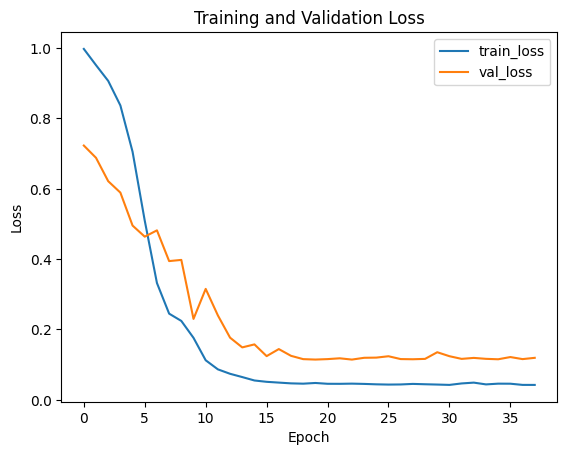

In [63]:
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [64]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step


In [65]:
rmse = np.sqrt(mse(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.21418899718445425


In [66]:
model.save("lstm_model_humidity.h5")

#### load saved best model

In [68]:
rh_load_model = load_model('humidity_model/model_checkpoint.keras')

In [69]:
loadmodel_prediction = rh_load_model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step


In [70]:
rmse = np.sqrt(mse(y_test, loadmodel_prediction))
print("RMSE:", rmse)

RMSE: 0.20986478348083581


## Comparison between actual Humidity and predicted Humidity

In [71]:
predictions = model.predict(X)

131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [74]:
predictions.shape

(4172,)

In [73]:
predictions =predictions.reshape(-1)

In [75]:
def reverse_preprocessed_temperature(arr):
    arr = (arr * rh_training_std ) + rh_training_mean
    return arr

In [76]:
act_val = reverse_preprocessed_temperature(y)

In [77]:
pre_val = reverse_preprocessed_temperature(predictions)

In [78]:
predVSactual = pd.DataFrame({'Actual_val(scaled)': y, 
                             'Predicted_val(scaled)': predictions,
                             "Actual rh [%]": act_val,
                             "Predicted rh [%]":pre_val
                             })

In [79]:
predVSactual

,Actual_val(scaled),Predicted_val(scaled),Actual rh [%],Predicted rh [%]
0,-1.757188,-1.765317,49.442760,49.344414
1,-1.809766,-1.827374,48.806667,48.593651
2,-1.825829,-1.842613,48.612335,48.409286
3,-1.824287,-1.881087,48.631001,47.943817
4,-1.816655,-1.910807,48.723331,47.584263
...,...,...,...,...
4167,0.255963,0.174363,73.797997,72.810783
4168,0.258333,0.173209,73.826668,72.796822
4169,0.268280,0.177762,73.946999,72.851906
4170,0.272572,0.193676,73.998932,73.044434


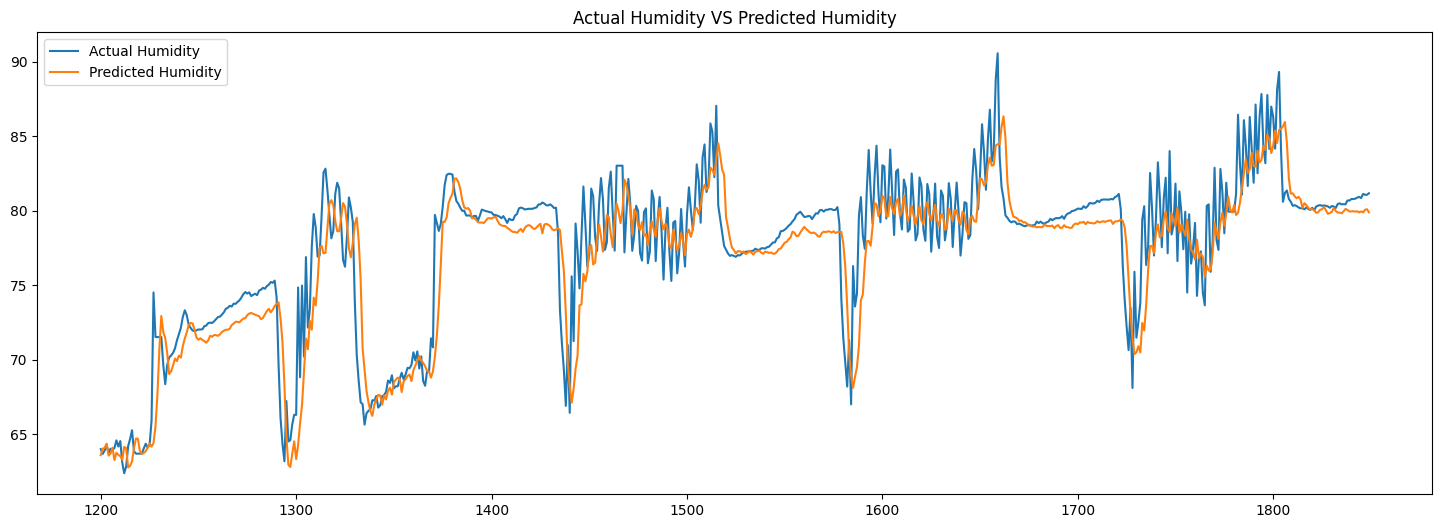

In [81]:
plt.figure(figsize=(18,6))

plt.plot(predVSactual["Actual rh [%]"][1200:1850], label="Actual Humidity")
plt.plot(predVSactual["Predicted rh [%]"][1200:1850], label="Predicted Humidity")
plt.title('Actual Humidity VS Predicted Humidity')
plt.legend(loc=0)